<a href="https://colab.research.google.com/github/hyeonjun/boostcourse_tensorflow/blob/master/lab_12_0_rnn_basics_keras_eager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model

In [ ]:
# Preparing dataset
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]


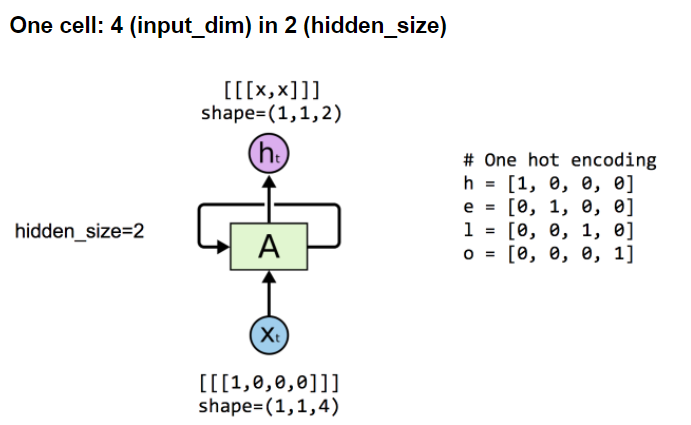

shape = 1, 1, 4는
batch_size, sequence_length, input_dimension으로 표현되도록 전처리되어야함을 의미한다.

hidden_size를 2로 설정했으므로 아웃풋의 shape가 

(1, 1, 2)로 변한 것을 확인할 수 있다.

첫 번째 방식.

RNN, LSTM, GRU 등 특정 셀을 선언하고 이를 루프하는 코드를 활용.

In [ ]:
# One cell RNN input_dim (4) => output_dim(2)
x_data = np.array([[h]], dtype=np.float32) # 알파벳 h에 해당하는 one hot vector를 생성하고 이를 RNN이 처리할 수있도록 전처리합니다.

# 이후 hidden_size가 2인 RNN을 생성하고 전처리한 데이터를 RNN에 입력으로 전달.
hidden_size = 2
cell  = layers.SimpleRNNCell(units=hidden_size) # creating SimpleRNNCell
rnn = layers.RNN(cell, return_sequences=True, return_state=True) # analogous to tf.nn.dynamic_rnn
outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
# outputs와 states 변수에는 값은 숫자값들이 저장되어 있지만
# shape가 다른 것을 볼 수 있다.
# 이 차이는 outputs 변수는 전체 시퀀스에 해당하는 hidden states 값들을 가지고 있고,
# states 변수는 시퀀스의 마지막 hidden states 값만 가지고 있기 때문이다.
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[0.67051905 0.59991854]]], shape: (1, 1, 2)
states: [[0.67051905 0.59991854]], shape: (1, 2)


두 번째 방식.

위의 방식에서의 특정 셀을 선언하여 루프한 것을 하나도 결합한 API를 활용하여 구현한다.

In [ ]:
# equivalent to above case
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True) # layers.SimpleRNN + layers.RNN
outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[-0.43436372 -0.55609775]]], shape: (1, 1, 2)
states: [[-0.43436372 -0.55609775]], shape: (1, 2)


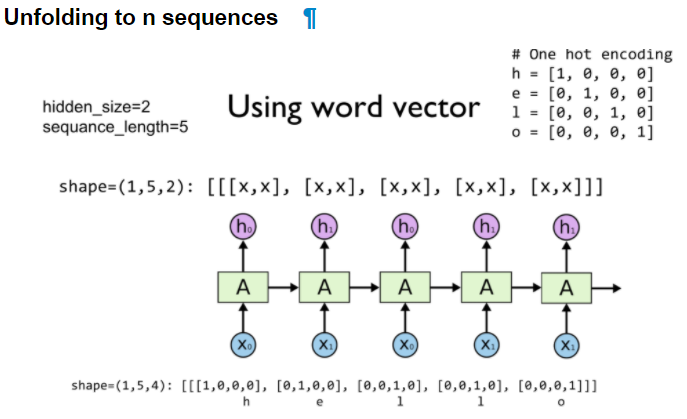

In [ ]:
# One cell RNN input_dim (4) -> output_dim (2). sequence : 5
# 각각의 알파벳에 해당하는 one hot vector를 기반으로 시퀀스를 만들어 RNN이 처리할 수 있도록 전처리한다.
x_data = np.array([[h,e,l,l,o]], dtype=np.float32)

# hidden_size가 2인 RNN을 생성하고 전처리한 데이터를 RNN에 전달
hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
# outputs 변수는 전체 시퀀스에 대한 hidden states 값을 가지고 있고,
# states 변수는 시퀀스의 마지막 hidden states 값을 갖고 있기 때문에,
# outputs 변수의 마지막 hidden states와 동일한 값을 가지고 있음을 확인할 수 있다.
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[-0.2587265  -0.527839  ]
  [-0.62078255  0.24251232]
  [-0.25282446 -0.26455745]
  [-0.59522     0.18503486]
  [ 0.64985967  0.18753019]]], shape: (1, 5, 2) 

states: [[0.64985967 0.18753019]], shape: (1, 2)


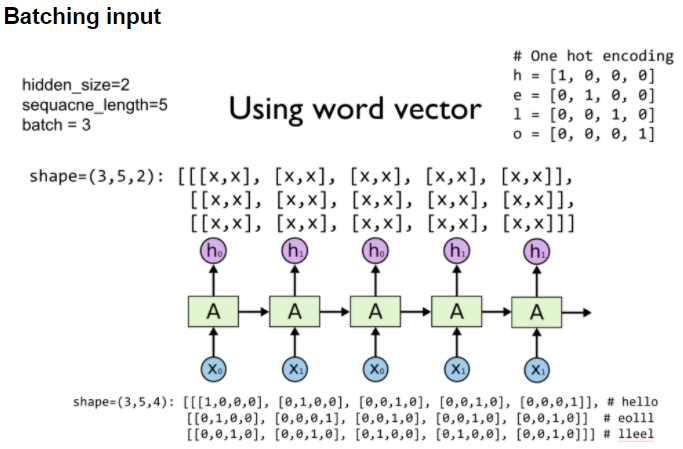

In [ ]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batches 'hello', 'eolll', 'lleel'
# 이번에는 시퀀스가 5인 데이터 3개로 구성된 mini_batch를 RNN 처리
x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
# outputs 변수는 mini_batch를 구성하고 있는 각각의 데이터의 전체 시퀀스에 해당하는 hidden states를 가지고 있고,
# states 변수는 mini_batch를 구성하고 있는 각각의 데이터 시퀀스에 마지막 hidden states를 가지고 있다.
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[ 0.26213756 -0.71158713]
  [ 0.596074    0.7839203 ]
  [ 0.4732254  -0.35116047]
  [-0.17348652  0.4954401 ]
  [-0.31869134 -0.85766935]]

 [[ 0.6796582   0.30083108]
  [ 0.2923703  -0.59057564]
  [-0.42480183  0.5753268 ]
  [-0.43693978 -0.61273474]
  [-0.7969731   0.29051104]]

 [[-0.38019827 -0.00138044]
  [-0.6212197  -0.19339131]
  [ 0.19382806  0.15528513]
  [ 0.7911818   0.27016258]
  [ 0.39449432  0.1724045 ]]], shape: (3, 5, 2) 

states: [[-0.31869134 -0.85766935]
 [-0.7969731   0.29051104]
 [ 0.39449432  0.1724045 ]], shape: (3, 2)
